In [1]:
# import libraries

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import matplotlib
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma

import os
import matplotlib.colors as colors

import scipy
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import glob

print ('libraries imported')

libraries imported


In [2]:
#read all diff files

from os import walk

f = []
mypath = "/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/sst_ann"

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    if '.DS_Store' in f:
        f.remove('.DS_Store')
    break
    
f

['PMIP4_observations_diff_sst_spatialmean_ann.nc',
 '.PMIP4_historical_diff_sst_spatialmean_ann.nc.icloud',
 '.PMIP4_1pctCO2_diff_sst_spatialmean_ann.nc.icloud',
 '.PMIP3_lgm_diff_sst_spatialmean_ann.nc.icloud',
 'PMIP3_observations_diff_sst_spatialmean_ann.nc',
 '.PMIP3_piControl_sst_spatialmean_ann.nc.icloud',
 '.PMIP3_historical_sst_spatialmean_ann.nc.icloud',
 '.PMIP3_abrupt4xCO2_diff_sst_spatialmean_ann.nc.icloud',
 '.PMIP4_lig127k_diff_sst_spatialmean_ann.nc.icloud',
 '.PMIP4_midHolocene_diff_sst_spatialmean_ann.nc.icloud',
 'PMIP3_midPliocene-eoi400_diff_sst_spatialmean_ann.nc',
 'PMIP3_lig127k_diff_sst_spatialmean_ann.nc',
 '.PMIP4_abrupt4xCO2_diff_sst_spatialmean_ann.nc.icloud',
 '.PMIP3_1pctCO2_diff_sst_spatialmean_ann.nc.icloud',
 '.PMIP3_midHolocene_diff_sst_spatialmean_ann.nc.icloud',
 'PMIP4_lgm_diff_sst_spatialmean_ann.nc',
 'PMIP4_midPliocene-eoi400_diff_sst_spatialmean_ann.nc']

In [3]:
def plotmap(field_to_plot, lat, lon, filename):

    cmap= plt.get_cmap('bwr') #define colour map
    clim=[-6.5,6.5]
    bounds = np.linspace(clim[0], clim[1], 21)
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    region=[-100, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]
    projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
    transform= ccrs.PlateCarree()
    plt.figure(figsize=(10,7))
    ax= plt.axes(projection=projection)
    ax.coastlines()
    gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    fig=ax.contourf(lon, lat, field_to_plot, levels=bounds, transform=transform, cmap=cmap, norm=norm)
    ax.set_extent(region, ccrs.PlateCarree())
    cax, kw = matplotlib.colorbar.make_axes(ax,location='bottom', pad=0.05, shrink=0.7)
    plt.colorbar(fig,cax=cax, extend='both', **kw)
    ax.text(0.5, -0.25, 'Mean SST ($^\circ$C)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor', fontweight='bold',
        transform=ax.transAxes)   
    plt.savefig(filename)

In [1]:
#open datasets
variable_name= 'sst_spatialmean_ann'

for filename in f:
    data_object = xr.open_dataset(f'/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/sst_ann/{filename}', decode_times=False)
    ensemble_mean = data_object.mean(dim='gcms', skipna=True, keep_attrs=False)
    field_to_plot = ensemble_mean[variable_name]
    lat=ensemble_mean['lat']
    lon=ensemble_mean['lon']
    field_to_plot, lon = add_cyclic_point(field_to_plot, coord=lon)
    output_filename = f'/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/sst_ann_png/{filename}'+'.png'
    plotmap(field_to_plot, lat, lon, output_filename)
    
field_to_plot

NameError: name 'f' is not defined

In [4]:
#read all diff files

from os import walk

f = []
mypath = "/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/sst_djf"

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    if '.DS_Store' in f:
        f.remove('.DS_Store')
    break
    
f

['PMIP4_observations_diff_sst_spatialmean_djf.nc',
 'PMIP4_lig127k_diff_sst_spatialmean_djf.nc',
 'PMIP3_historical_sst_spatialmean_djf.nc',
 'PMIP3_1pctCO2_diff_sst_spatialmean_djf.nc',
 'PMIP3_lgm_diff_sst_spatialmean_djf.nc',
 'PMIP3_observations_diff_sst_spatialmean_djf.nc',
 'PMIP4_1pctCO2_diff_sst_spatialmean_djf.nc',
 'PMIP3_abrupt4xCO2_diff_sst_spatialmean_djf.nc',
 'PMIP3_midPliocene-eoi400_diff_sst_spatialmean_djf.nc',
 'PMIP3_midHolocene_diff_sst_spatialmean_djf.nc',
 'PMIP3_lig127k_diff_sst_spatialmean_djf.nc',
 'PMIP3_piControl_sst_spatialmean_djf.nc',
 'PMIP4_abrupt4xCO2_diff_sst_spatialmean_djf.nc',
 'PMIP4_midHolocene_diff_sst_spatialmean_djf.nc',
 'PMIP4_lgm_diff_sst_spatialmean_djf.nc',
 'PMIP4_midPliocene-eoi400_diff_sst_spatialmean_djf.nc']

In [7]:
def plotmap(field_to_plot, lat, lon, filename):

    cmap= plt.get_cmap('bwr') #define colour map
    clim=[-6,6]
    bounds = np.linspace(clim[0], clim[1], 21)
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    region=[-80, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]
    projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
    transform= ccrs.PlateCarree()
    plt.figure(figsize=(10,7))
    ax= plt.axes(projection=projection)
    ax.coastlines()
    gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = True
    gl.ylabels_right = False 
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    fig=ax.contourf(lon, lat, field_to_plot, levels=bounds, transform=transform, cmap=cmap, norm=norm)
    ax.set_extent(region, ccrs.PlateCarree())
    #cax, kw = matplotlib.colorbar.make_axes(ax,location='right', pad=0.05, shrink=0.77)
    #cb = plt.colorbar(fig,cax=cax, extend='both', **kw)
    #ax.set_label(label='Mean SST Bias ($^{\circ}$C)', size=20)
    plt.savefig(filename,bbox_inches='tight',pad_inches = 0.02)
    

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/matplotlib/contour.py:1494: UserWarning: 

masked_array(
  data=[[       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        ...,
        [0.05331409, 0.05312062, 0.05294161, ..., 0.05367975, 0.05350273,
         0.05331409],
        [0.0549334 , 0.05483956, 0.05474102, ..., 0.05515446, 0.05503662,
         0.0549334 ],
        [0.05787992, 0.05784303, 0.0577963 , ..., 0.05796184, 0.05791806,
         0.05787992]],
  mask=False,
  fill_value=1e+20)

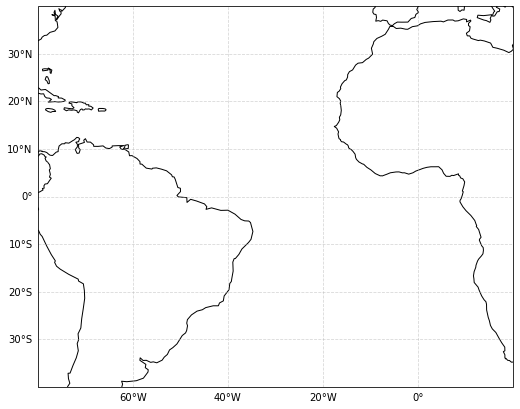

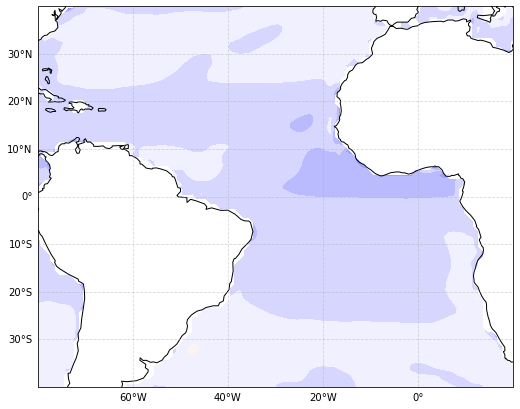

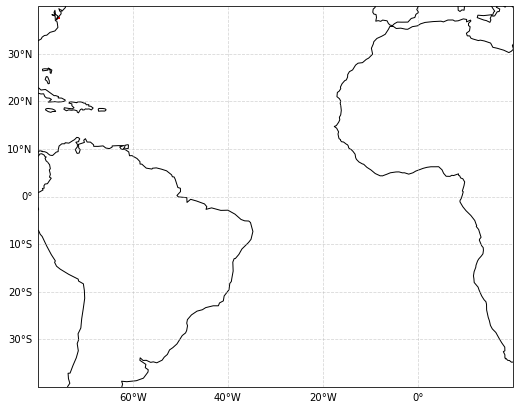

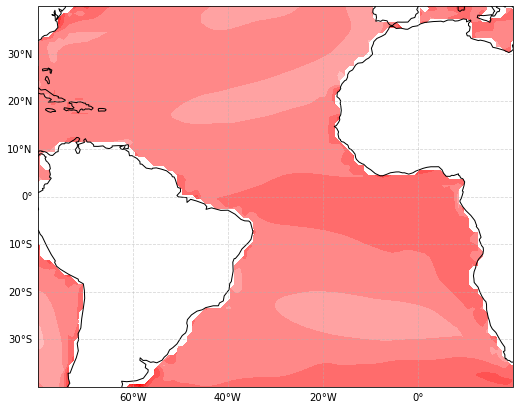

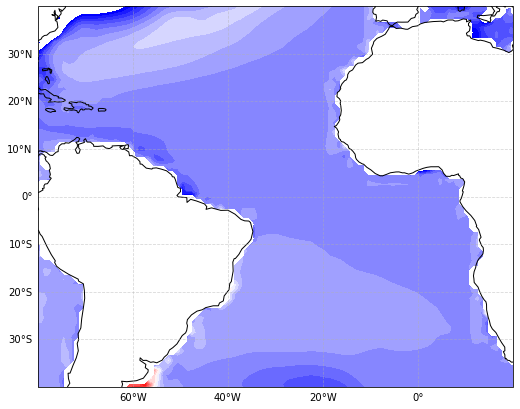

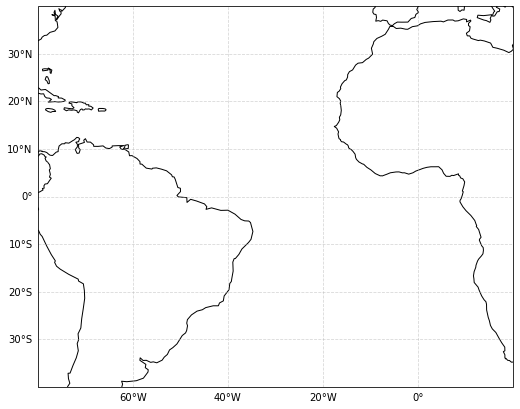

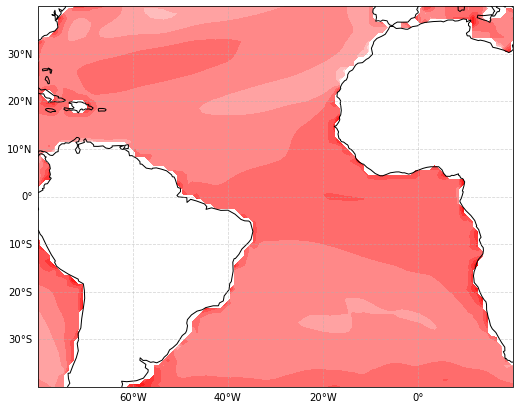

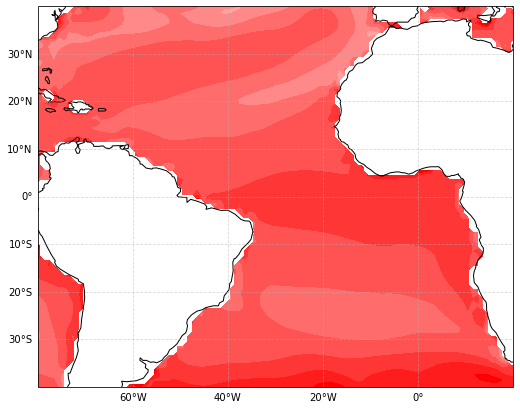

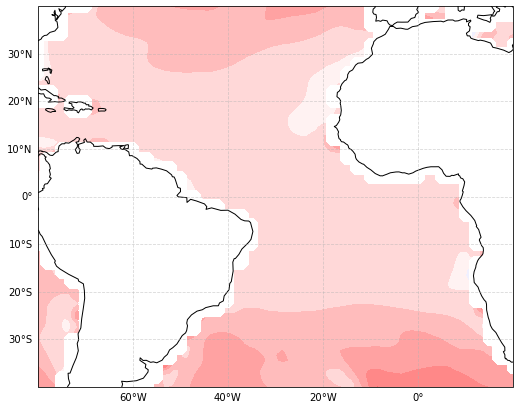

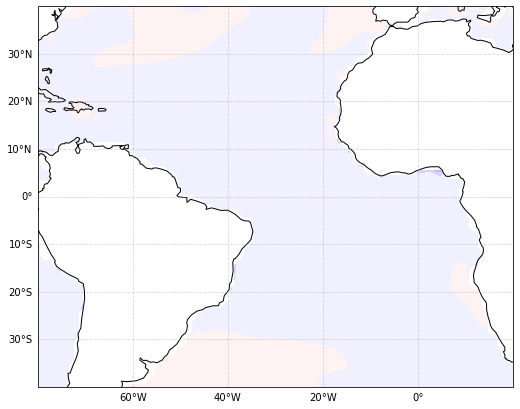

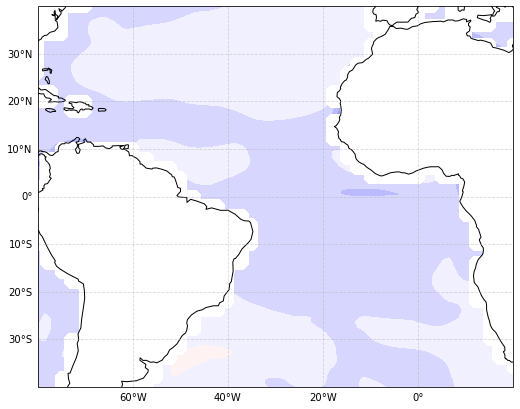

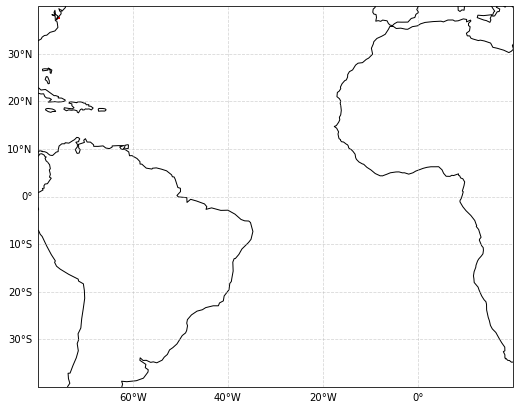

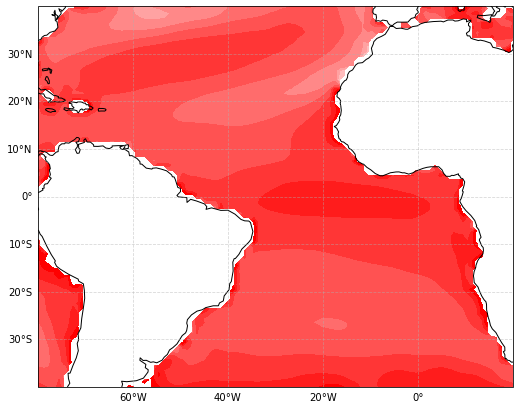

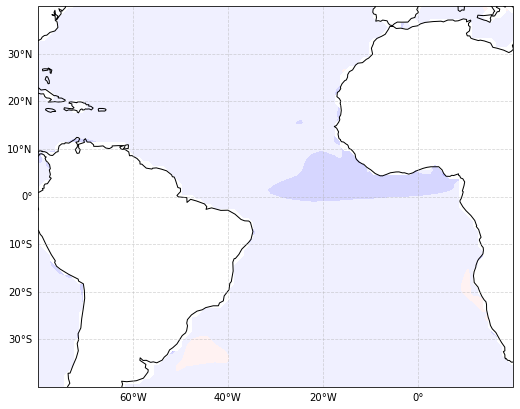

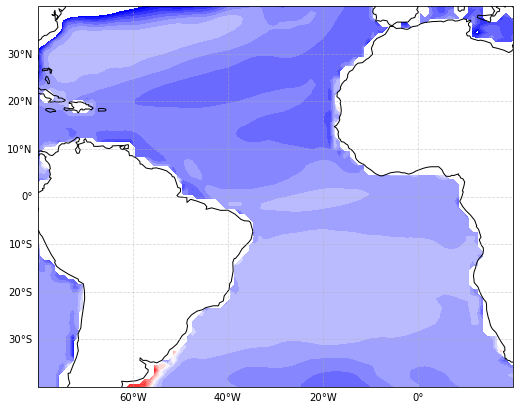

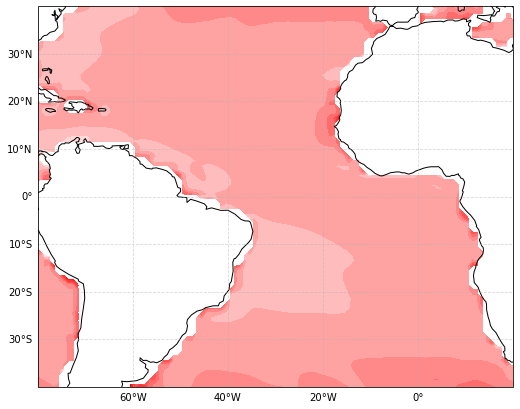

In [8]:
#open datasets
variable_name= 'sst_spatialmean_djf'

for filename in f:
    data_object = xr.open_dataset(f'/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/sst_djf/{filename}', decode_times=False)
    ensemble_mean = data_object.mean(dim='gcms', skipna=True, keep_attrs=False)
    field_to_plot = ensemble_mean[variable_name]
    lat=ensemble_mean['lat']
    lon=ensemble_mean['lon']
    field_to_plot, lon = add_cyclic_point(field_to_plot, coord=lon)
    output_filename = f'/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/sst_djf_png/{filename}'+'.png'
    plotmap(field_to_plot, lat, lon, output_filename)
    
field_to_plot

In [10]:
#read all diff files

from os import walk

f = []
mypath = "/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/sst_jja"

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    if '.DS_Store' in f:
        f.remove('.DS_Store')
    break
    
f

['PMIP4_observations_diff_sst_spatialmean_jja.nc',
 'PMIP4_lig127k_diff_sst_spatialmean_jja.nc',
 'PMIP3_historical_sst_spatialmean_jja.nc',
 'PMIP3_observations_diff_sst_spatialmean_jja.nc',
 'PMIP3_lgm_diff_sst_spatialmean_jja.nc',
 'PMIP3_1pctCO2_diff_sst_spatialmean_jja.nc',
 'PMIP3_midHolocene_diff_sst_spatialmean_jja.nc',
 'PMIP3_midPliocene-eoi400_diff_sst_spatialmean_jja.nc',
 'PMIP4_1pctCO2_diff_sst_spatialmean_jja.nc',
 'PMIP3_abrupt4xCO2_diff_sst_spatialmean_jja.nc',
 'PMIP4_lgm_diff_sst_spatialmean_jja.nc',
 'PMIP4_midHolocene_diff_sst_spatialmean_jja.nc',
 'PMIP4_midPliocene-eoi400_diff_sst_spatialmean_jja.nc',
 'PMIP4_abrupt4xCO2_diff_sst_spatialmean_jja.nc',
 'PMIP3_piControl_sst_spatialmean_jja.nc',
 'PMIP3_lig127k_diff_sst_spatialmean_jja.nc']

In [11]:
def plotmap(field_to_plot, lat, lon, filename):

    cmap= plt.get_cmap('bwr') #define colour map
    clim=[-6,6]
    bounds = np.linspace(clim[0], clim[1], 21)
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    region=[-80, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]
    projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
    transform= ccrs.PlateCarree()
    plt.figure(figsize=(10,7))
    ax= plt.axes(projection=projection)
    ax.coastlines()
    gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    #gl.xlabels_bottom = False
    gl.ylabels_left = False
    gl.ylabels_right = False 
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    fig=ax.contourf(lon, lat, field_to_plot, levels=bounds, transform=transform, cmap=cmap, norm=norm)
    ax.set_extent(region, ccrs.PlateCarree())
    cax, kw = matplotlib.colorbar.make_axes(ax,location='right', pad=0.05, shrink=0.77)
    cb = plt.colorbar(fig,cax=cax, extend='both', **kw)
    cb.set_label(label='Change in SST ($^{\circ}$C)', size=20)
    plt.savefig(filename,bbox_inches='tight',pad_inches = 0.02)
    

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/matplotlib/contour.py:1494: UserWarning: 

masked_array(
  data=[[       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        ...,
        [0.26900748, 0.26908168, 0.26939097, ..., 0.26891077, 0.26900689,
         0.26900748],
        [0.2596267 , 0.25965072, 0.25975482, ..., 0.25959374, 0.2596265 ,
         0.2596267 ],
        [0.25493371, 0.25493371, 0.25493371, ..., 0.25493371, 0.25493371,
         0.25493371]],
  mask=False,
  fill_value=1e+20)

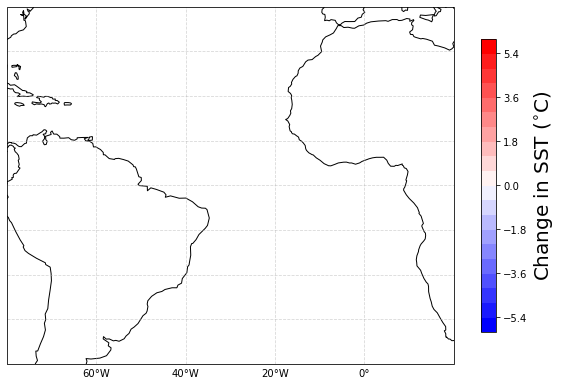

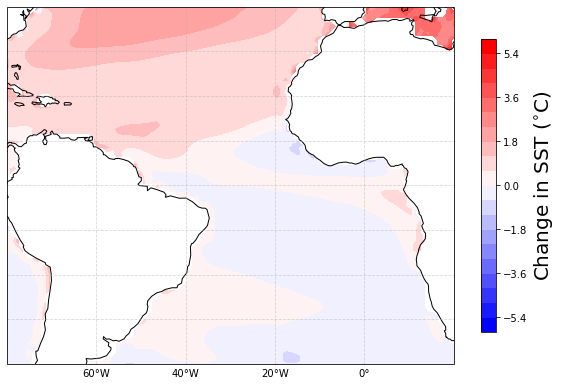

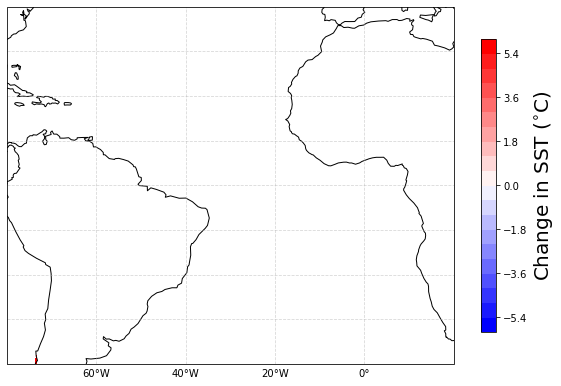

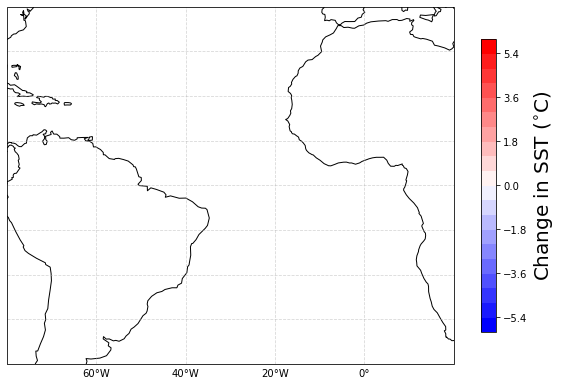

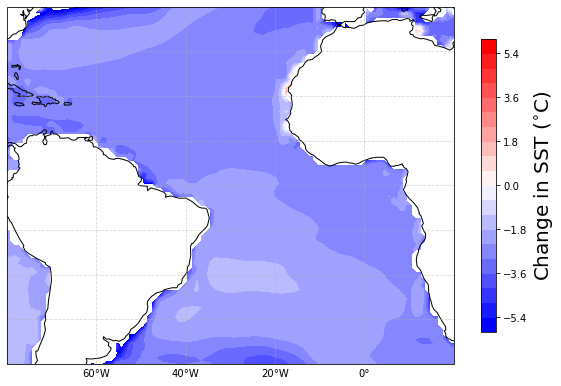

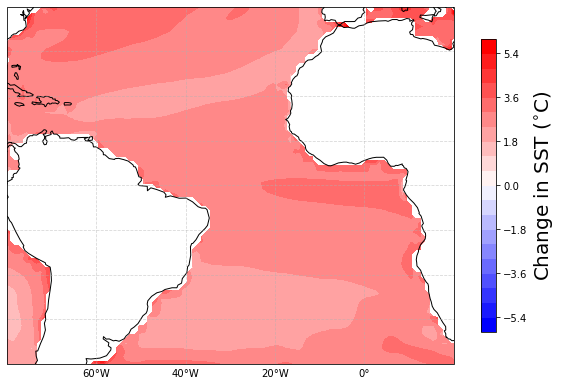

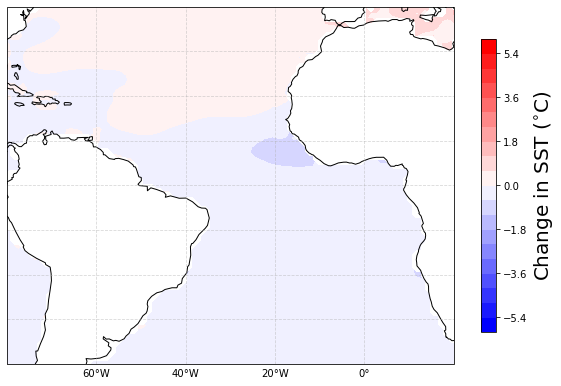

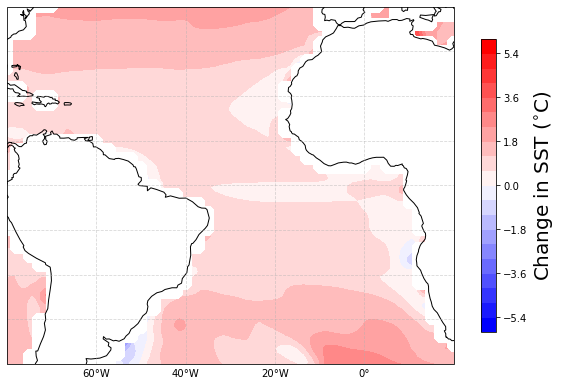

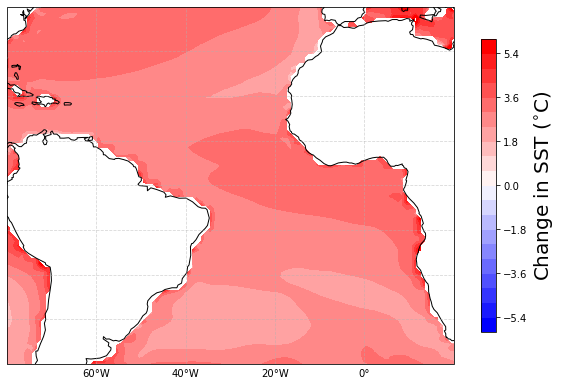

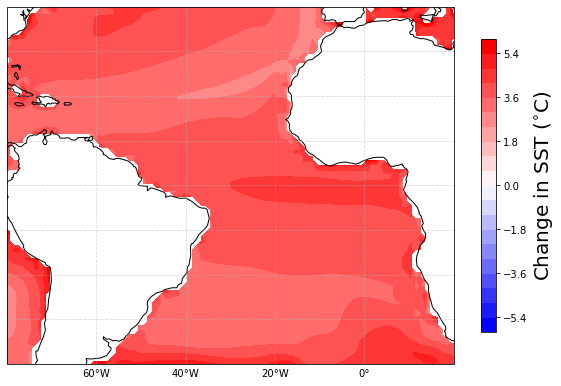

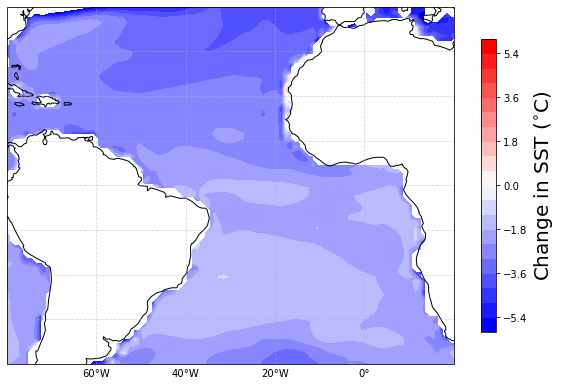

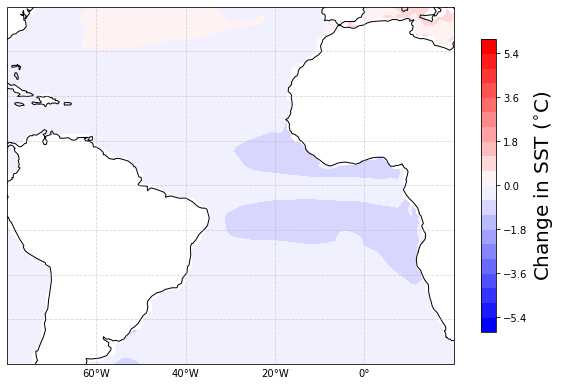

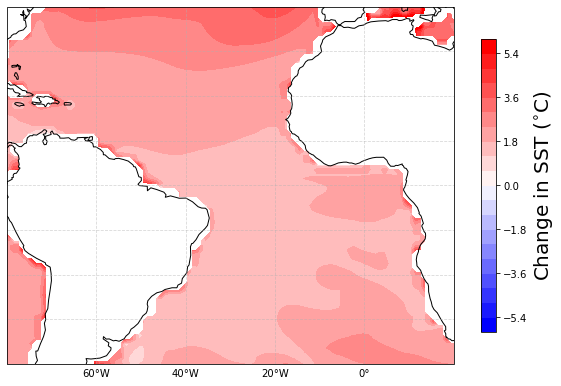

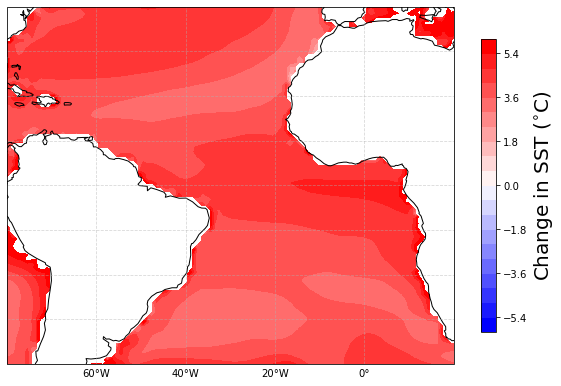

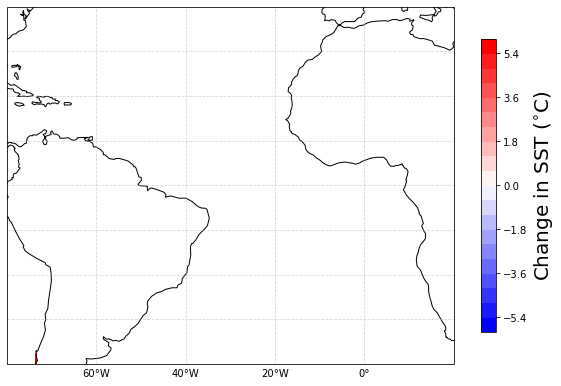

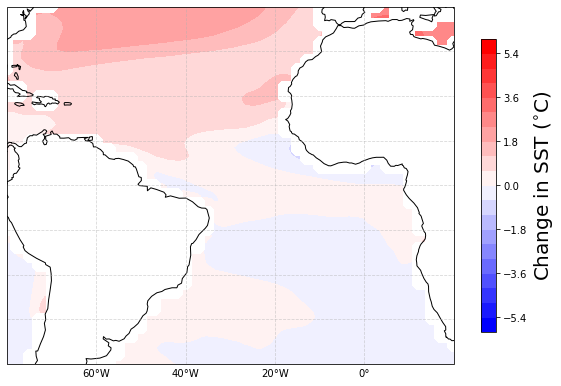

In [12]:
#open datasets
variable_name= 'sst_spatialmean_jja'

for filename in f:
    data_object = xr.open_dataset(f'/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/sst_jja/{filename}', decode_times=False)
    ensemble_mean = data_object.mean(dim='gcms', skipna=True, keep_attrs=False)
    field_to_plot = ensemble_mean[variable_name]
    lat=ensemble_mean['lat']
    lon=ensemble_mean['lon']
    field_to_plot, lon = add_cyclic_point(field_to_plot, coord=lon)
    output_filename = f'/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/sst_jja_png/{filename}'+'.png'
    plotmap(field_to_plot, lat, lon, output_filename)
    
field_to_plot